In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
df = pd.read_csv('C:\\Users\\LONOVO\\Downloads\\House Price India.csv\\House Price India.csv')

In [3]:

df.columns


Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'Price'],
      dtype='object')

id                        0
Date                      0
number of bedrooms        0
number of bathrooms       0
living area               0
lot area                  0
number of floors          0
waterfront present        0
number of views           0
condition of the house    0
Price                     0
dtype: int64


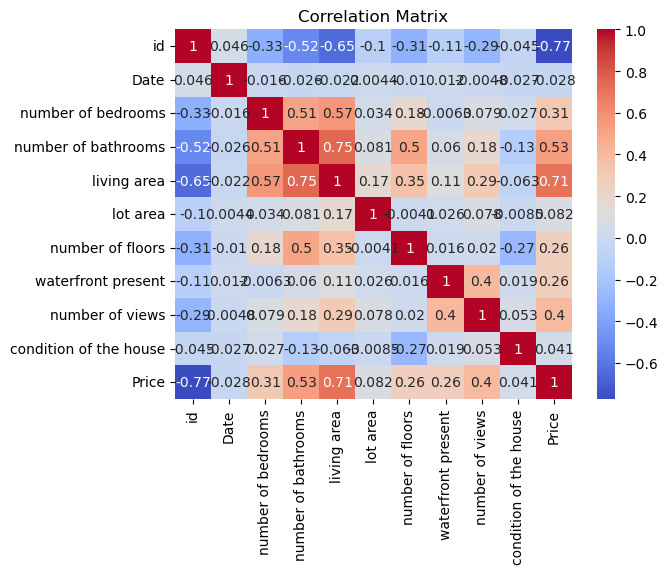

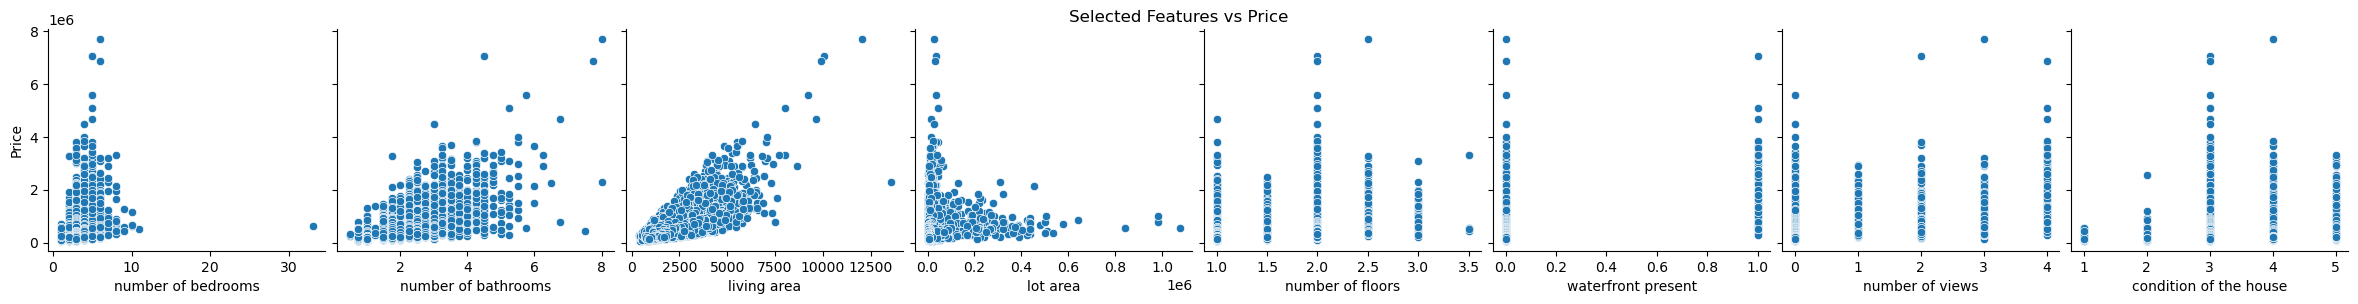

In [4]:
print(df.isnull().sum())

# Correlation matrix to understand feature relationships
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

selected_features = ['number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 'waterfront present', 'number of views', 'condition of the house']

X = df[selected_features]
y = df['Price']

pairplot_data = X.copy()
pairplot_data['Price'] = y

# Create pairplot
sns.pairplot(pairplot_data, x_vars=selected_features, y_vars=['Price'], kind='scatter', diag_kind='kde', height=3)
plt.suptitle("Selected Features vs Price")
plt.show()





In [5]:
# Building the Linear Regression Model
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fitting the model on the training data
model.fit(X_train, y_train)


# Model Evaluation
y_pred = model.predict(X_test)

# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 56848167401.32927
R-squared: 0.5965896192959166


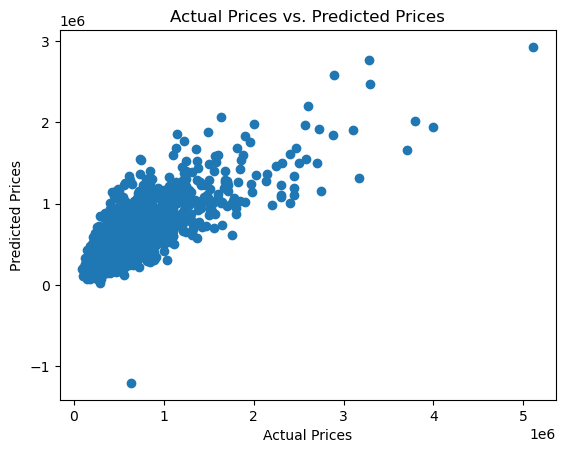

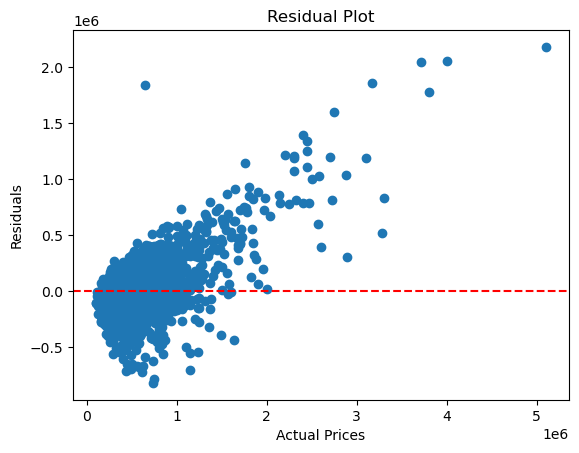

Predicted Price: 337145.4703663577


C:\Users\LONOVO\Downloads\anoconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
# Predictions and Visualization
# To visualize the predictions against actual prices, we'll use a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

# We can also create a residual plot to check the model's performance
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


new_data = [[3, 2, 1500, 4000, 1, 0, 0, 3]]
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price[0])